## Računanje povprečja

V tem podrazdelku si ogledamo razširjen problem normalne porazdelitve.

Recimo, da zaposlujemo kandidate in se poskušamo odločiti za najbolšega. Odločili smo se, da bomo sledili strategiji ustavljanja, vendar z twistom. Ko končamo z našim vzorcem bomo izračunali njegovo povprečje in ga pomnožili s faktorjem $\alpha$. Tako se bomo izbrali naslednjega kandidata, ki je boljši od $\alpha \cdot \text{povprečje}$.

### Od 1 do $n$

Tukaj bomo razdelili kandidatkam ocene od ena do $n$, pri čemer nobeni dve kandidatki ne bosta imeli enake ocene. Upoštevamo, da bo povprečje najbrž približno $\frac{n}{2}$ in zato za $\alpha$  vzamemo 2.

In [1]:
import numpy as np 
import random
import porocni_problem as fun
import matplotlib.pyplot as plt


n = 100 # število kandidatk
m = 30000 #kolikokrat poženemo proces iskanja najbolšega partnerja
alfa = 2

tabela_partnerjev = {}
for i in range(m):
    partnerji = list(range(1,n+1))
    random.shuffle(partnerji)
    tabela_partnerjev[i] = partnerji

Vredno je omeniti, da smo v tem primeru vedno zadovoljni z izbiro našega kandidata, če smo ga le izbrali. 

In [2]:
vsotke = [0] * n
for stop in range(n):
    for i in range(m):
        if fun.NajbolsiPartner_povprecje(tabela_partnerjev[i], stop, alfa) != 0 :
            vsotke[stop] += 1

c:\Users\Uporabnik\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


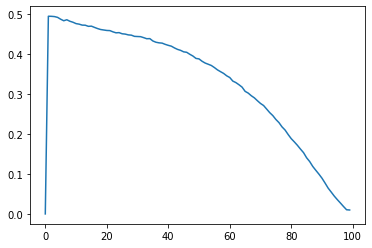

In [3]:
verjetnosti = [x / m for x in vsotke]
x = [i for i in range(n)]

plt.plot(x, verjetnosti)
plt.show()

Logično opazimo, da število upada, saj če imamo večji vzorec je večja verjetnost, da res iščemo število veliko okoli 100. Kar pa tudi pomeni, da je večja verjetnost, da smo ga že izbrali. 

In [4]:
vsotke = [0] * n
for stop in range(n):
    for i in range(m):
        if fun.NajbolsiPartner_povprecje(tabela_partnerjev[i], stop, alfa) == 100 :
            vsotke[stop] += 1

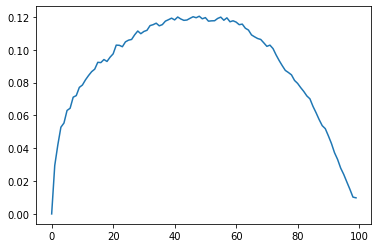

In [5]:
verjetnosti = [x / m for x in vsotke]
x = [i for i in range(n)]

plt.plot(x, verjetnosti)
plt.show()

Kljub zanimivi taktiki ugotovimo, da se nam le ta ne splača, ko rešujemo problem od 1 do $n$.
(Verjetnosti so znatno manjše kot tiste pri klasični strategiji.) 

### Sprememba $\alpha$

V prejšnjem razdelku smo pogledali rezultate pri $\alpha = 2$. 
Morda izbira za $\alpha$ ni bila najbolša. Poglejmo, kaj se zgodi, če $\alpha$ spremenimo.

Tokrat bo $\alpha$ spremenljivka, fiksirali pa bomo stop pri 37.

In [6]:
stop = 37

In [7]:
vsotke = [0] * 25
for al in range(25):
    alfa = al/10
    for i in range(m):
        if fun.NajbolsiPartner_povprecje(tabela_partnerjev[i], stop, alfa) == n :
            vsotke[al] += 1

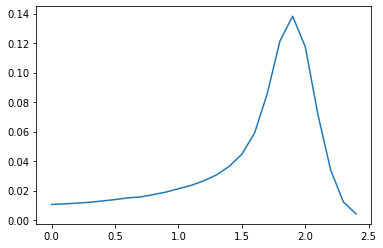

In [8]:
verjetnosti = [x / m for x in vsotke]
alfe = [i for i in np.arange(0.0, 2.5, 0.1)]

plt.plot(alfe, verjetnosti)
plt.show()

In [9]:
np.argmax(vsotke) / 10

1.9

Opazimo, da se nam (če se ustavimo pri 37) najbolj splača vzeti $\alpha = 1.9 $.

Primerjajmo, kakšna bo razlika, če namesto $\alpha = 2$ vzamemo $\alpha = 1.9$.

In [10]:
alfa19 = 1.9
alfa2 = 2

vsotke19 = [0] * n
vsotke2 = [0] * n

for stop in range(n):
    for i in range(m):
        if fun.NajbolsiPartner_povprecje(tabela_partnerjev[i], stop, alfa19) == 100 :
            vsotke19[stop] += 1
        if fun.NajbolsiPartner_povprecje(tabela_partnerjev[i], stop, alfa2) == 100 :
            vsotke2[stop] += 1

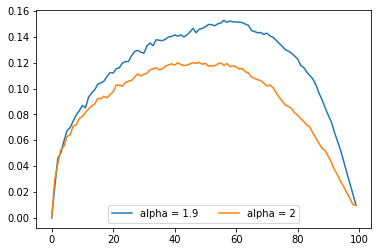

In [11]:
verjetnosti19 = [x / m for x in vsotke19]
verjetnosti2 = [x / m for x in vsotke2]
x = [i for i in range(n)]

plt.plot(x, verjetnosti19, label='alpha = 1.9')
plt.plot(x, verjetnosti2, label='alpha = 2')
plt.legend(ncol=3)
plt.show()

Opazimo, da se nam pri tej metodi splača vzeti velik vzorec. Vendar verjetnosti, da dobimo najbolšega kandidata še vedno niso primerljive s tistimi od osnovne metode. 

### Normalna porazdelitev

Oglejmo si, kakšen rezultat dobimo, če to taktiko uporabimo na normalni porazdelitvi. Za alfopo prejšnji ugotovitvi vzamemo 1.9.

In [12]:
x = np.random.normal(loc=n/2, scale=n/6, size=(m, n))
x =  np.around(x, decimals=0)

In [13]:
y = np.random.normal(loc=n/2, scale=n/5, size=(m, n))
y =  np.around(y, decimals=0)

In [14]:
alfa = 1.9

In [15]:
vsotke_x = [0] * n
vsotke_y = [0] * n

for stop in range(n):
    for i in range(m):
        najbolsa_nevesta_x = max(x[i])
        najbolsa_nevesta_y = max(y[i])
        if fun.NajbolsiPartner_povprecje(x[i], stop,alfa) == najbolsa_nevesta_x :
            vsotke_x[stop] += 1
        if fun.NajbolsiPartner_povprecje(y[i], stop,alfa) == najbolsa_nevesta_y :
            vsotke_y[stop] += 1

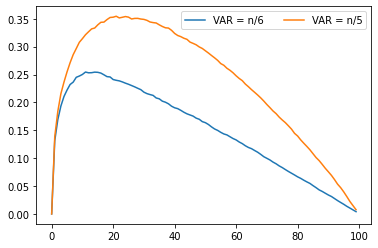

In [16]:
verjetnosti_x = [x / m for x in vsotke_x]
verjetnosti_y = [x / m for x in vsotke_y]
t = [i for i in range(n)]

plt.plot(t, verjetnosti_x, label='VAR = n/6')
plt.plot(t, verjetnosti_y, label='VAR = n/5')

plt.legend(ncol=3)
plt.show()

Opazimo, da se je za razliko od računanja v 3 z normalno porazdelitvijo, ko se grafa praktično nista razlikovala, se tukaj zelo razlikujeta za različno variacijo.

Opazimo tudi, da smo pri normalni porazdelitvi z metodo računanja povprečja bolj uspešni kot pri metodi od 1 do 100.